# Titantic Dataset
**Author:** Brett Neely

**Date:** March 16, 2025  

**Introduction:** The purpose of this notebook is to explore the popular Titanic dataset and prepare it for use by a model.

### Section 1: Import and Inspect the Data
#### Complete initial data exploration of the dataset

In [1]:
# Imports
import seaborn as sns
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

In [2]:
# Load the dataset from Seaborn
titanic = sns.load_dataset('titanic')

In [3]:
# Display the column names, null counts and datatypes
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
# Display the first 5 rows
print(titanic.head(n=5))

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [5]:
# Summary statistics
print(titanic.describe())

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


In [6]:
# Check for null values
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [7]:
# Check for correlations
print(titanic.corr(numeric_only=True))

            survived    pclass       age     sibsp     parch      fare  \
survived    1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307   
pclass     -0.338481  1.000000 -0.369226  0.083081  0.018443 -0.549500   
age        -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067   
sibsp      -0.035322  0.083081 -0.308247  1.000000  0.414838  0.159651   
parch       0.081629  0.018443 -0.189119  0.414838  1.000000  0.216225   
fare        0.257307 -0.549500  0.096067  0.159651  0.216225  1.000000   
adult_male -0.557080  0.094035  0.280328 -0.253586 -0.349943 -0.182024   
alone      -0.203367  0.135207  0.198270 -0.584471 -0.583398 -0.271832   

            adult_male     alone  
survived     -0.557080 -0.203367  
pclass        0.094035  0.135207  
age           0.280328  0.198270  
sibsp        -0.253586 -0.584471  
parch        -0.349943 -0.583398  
fare         -0.182024 -0.271832  
adult_male    1.000000  0.404744  
alone         0.404744  1.000000  


In [8]:
# Load the dataset into a dataframe for additional data exploration
df = titanic

In [9]:
# Print hte min, max, and median age of the Titanic dataset
min_age = df['age'].min()
max_age = df['age'].max()
median_age = df['age'].median()

print(f"Min Age: {min_age}")
print(f"Max Age: {max_age}")
print(f"Median Age: {median_age}")

Min Age: 0.42
Max Age: 80.0
Median Age: 28.0


#### Section 1 Reflection
##### In the Titanic dataset, there are 891 data instances with 15 features (or columns). The columns and their corresponding datatypes are:
- survived (integer)  
- pclass (integer) 
- sex (string)
- age (float)
- sibsp (integer)
- parch (integer)
- fare (float)
- embarked (string)
- class (string)
- who (string)
- adult_male (boolean)
- deck (string)
- embark_town (string)
- alive (string)
- alone (boolean)

##### Of these features, there are four with missing values: age has 177, deck has 688, embark_town has 2, and embarked has 2. The features with the highest correlation are parch and sibsp.

### Section 2: Data Exploration and Preparation
#### 2.1 Exploring data patterns and distributions through visualizations

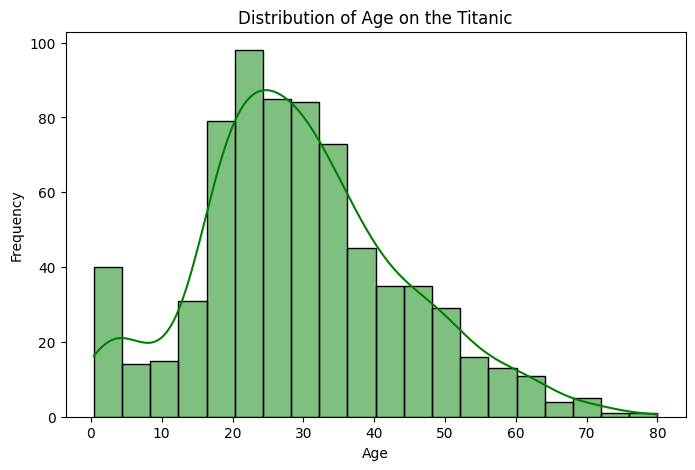

In [10]:
# Build a histogram of the age feature

df_age = df['age'].dropna()

plt.figure(figsize=(8,5))
sns.histplot(df_age, bins=20, kde=True, edgecolor='black', color='green')

plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Distribution of Age on the Titanic")

plt.show()

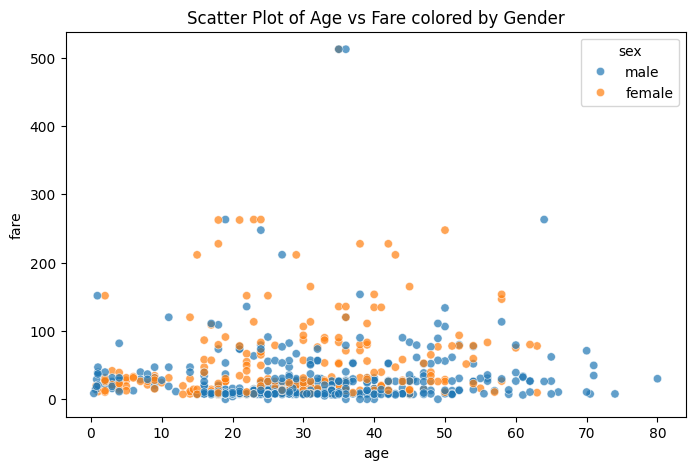

In [11]:
# Build a scatter plot of age vs fare, colored by gender

df_subset = df[['age', 'fare', 'sex']].dropna()

plt.figure(figsize=(8,5))
sns.scatterplot(data=df_subset, x='age', y='fare', hue='sex', alpha=0.7)
plt.xlabel("age")
plt.ylabel("fare")
plt.title("Scatter Plot of Age vs Fare colored by Gender")

plt.show()

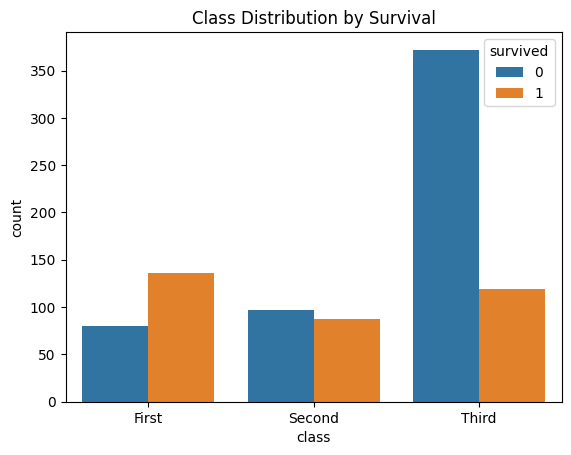

In [12]:
# Count plot of class and survival

sns.countplot(x='class', hue='survived', data=df)
plt.title('Class Distribution by Survival')

plt.show()

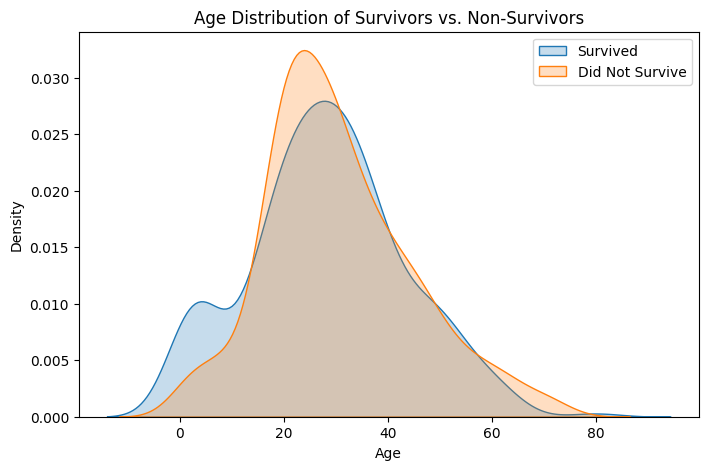

In [13]:
# Create a Kernel Density Plot of Survivors vs. Non-Survivors by Age

plt.figure(figsize=(8,5))
sns.kdeplot(df[df['survived'] == 1]['age'].dropna(), label="Survived", fill=True)
sns.kdeplot(df[df['survived'] == 0]['age'].dropna(), label="Did Not Survive", fill=True)

plt.xlabel("Age")
plt.ylabel("Density")
plt.title("Age Distribution of Survivors vs. Non-Survivors")
plt.legend()

plt.show()

#### Section 2.1 Reflection
##### Some observations based on the visualizations created:
- Most passengers were between 15-40 years old
- There are two male passengers who paid over 500 for fare - which is well above the average of all other passengers
- Third class passengers had a lower survival rate than second and first class passengers
- There was not a strong correlation between those that survived vs. did not survive as it relates to passenger age

#### 2.2 Handle Missing Values and Clean Data

In [14]:
# Replace missing age values with median age in the dataframe
# median_age is a previously defined object in Section 1 - it will get reused here

df['age'] = df['age'].fillna(median_age)

In [15]:
# Fill missing values for embark_town

df['embark_town'] = df['embark_town'].fillna(df['embark_town'].mode()[0])

#### 2.3 Feature Engineering

In [16]:
# Create a new feature for Family Size
df['family_size'] = df['sibsp'] + df['parch'] + 1

print(df['family_size'].unique())

[ 2  1  5  3  7  6  4  8 11]


In [17]:
# Convert categorical data to numeric: sex & embarked
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['embarked'] = df['embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [18]:
# Convert numerical data to categorical: survival_label
df['survival_label'] = df['survived'].map({0: 'Did Not Survive', 1: 'Survived'})

print(df['survival_label'].head(5))

0    Did Not Survive
1           Survived
2           Survived
3           Survived
4    Did Not Survive
Name: survival_label, dtype: object


In [19]:
# Create a binary feature: alone
df['alone'] = df['alone'].astype(int)

#### Section 2.2 Reflection
##### Family size can be a useful feature for predicting survival because it may have been harder for larger families to get onto a life raft vs. a smaller family. We convert categorical data to numeric for ease of model training.

### Section 3: Feature Selection and Justification
#### 3.1 Choose features and target

In [20]:
# Define x and y
# x will represent the input features
# y will represent the target varaible

X = df[['age', 'fare', 'pclass', 'sex', 'family_size']]
y = df['survived']

#### Section 3 Reflection
##### These features are selected because they are numerical. All of these features are likely to be highly predictive of survival.

### Section 4: Splitting

In [21]:
# Split data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print('Train size:', len(X_train))
print('Test size:', len(X_test))

Train size: 712
Test size: 179


In [22]:
# Stratified train / test split

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

for train_indices, test_indices in splitter.split(X, y):
    X_train = X.iloc[train_indices]
    X_test = X.iloc[test_indices]

print('Train size:', len(X_train))
print('Test size:', len(X_test))

Train size: 712
Test size: 179


In [23]:
# View results

print("Original Class Distribution:\n", y.value_counts(normalize=True))
print("Train Set Class Distribution:\n", X_train['pclass'].value_counts(normalize=True))
print("Test Set Class Distribution:\n", X_test['pclass'].value_counts(normalize=True))

Original Class Distribution:
 survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64
Train Set Class Distribution:
 pclass
3    0.561798
1    0.227528
2    0.210674
Name: proportion, dtype: float64
Test Set Class Distribution:
 pclass
3    0.508380
1    0.301676
2    0.189944
Name: proportion, dtype: float64


#### Section 4 Reflection
##### Stratification improves model performance by proprotionally representing each class in the training and test sets. The stratificated shuffle split produced better class balance.